In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr

In [2]:
_scratch = "/pscratch/sd/n/nagarwal/"
_prototype = "cp1"
_expt = "R0"
_fig_dir = os.path.join(os.path.abspath(""), "figures")

In [3]:
ds = xr.open_dataset(os.path.join(_scratch, _prototype, _expt, "loss.nc"))
ds.load()

<xarray.Dataset> Size: 134MB
Dimensions:                (optim_step: 237300, epoch: 100, channel: 133)
Coordinates:
  * optim_step             (optim_step) int64 2MB 0 1 2 ... 237297 237298 237299
  * epoch                  (epoch) int64 800B 1 2 3 4 5 6 ... 95 96 97 98 99 100
  * channel                (channel) int64 1kB 0 1 2 3 4 ... 128 129 130 131 132
Data variables:
    loss                   (optim_step) float32 949kB 0.005757 ... 0.0004822
    loss_by_channel        (optim_step, channel) float32 126MB 4.287e-05 ... ...
    loss_by_channel_valid  (epoch, channel) float32 53kB 6.328e-06 ... 9.912e-06
    loss_avg               (epoch) float32 400B 0.001717 0.001057 ... 0.0005063
    loss_valid             (epoch) float32 400B 0.001265 0.001025 ... 0.0006284
    mgrad                  (epoch) float32 400B 2.328e-07 ... 1.531e-07
    g_norm                 (optim_step) float64 2MB nan nan nan ... nan nan nan
    learning_rate          (optim_step) float32 949kB 0.0 1e-06 ... 0.0 0.0
    epoch_label            (optim_step) float64 2MB 1.0 1.0 1.0 ... 100.0 100.0
Attributes:
    batch_size:  16

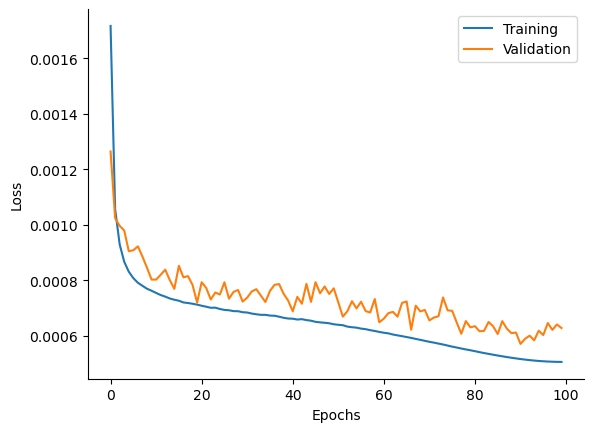

In [4]:
fig, ax = plt.subplots()
epochs = ds.sizes["epoch"]

ax.plot(ds.loss_avg, label="Training")
ax.plot(ds.loss_valid, label="Validation")
ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)
plt.xlabel("Epochs"); plt.ylabel('Loss')
plt.legend()
fig.savefig(os.path.join(_fig_dir, f"loss_{_prototype}_{_expt}.png"))
plt.show()

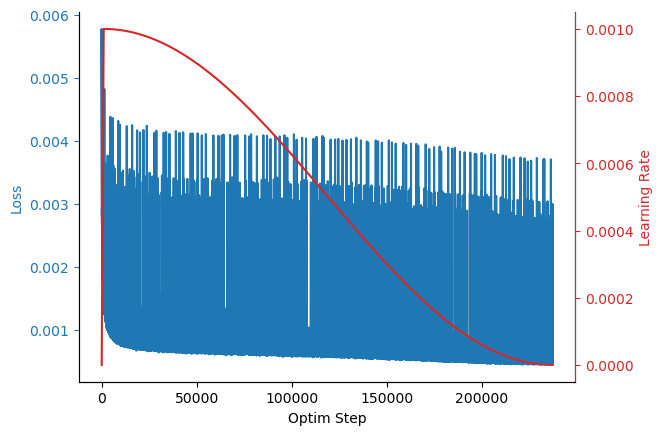

In [5]:
fig, ax = plt.subplots()
epochs = ds.sizes["epoch"]

ax.plot(ds.loss, label="Training Loss", color="C0")
ax.spines["left"].set_color("C0")
ax.set_ylabel("Loss", color="C0")
ax.tick_params(axis="y", color="C0", labelcolor="C0")
ax.set_xlabel("Optim Step")
ax.spines["top"].set_visible(False)

ax_right = ax.twinx()
ax_right.plot(ds.learning_rate, label="Learning Rate", color="C3")
ax_right.spines["right"].set_color("C3")
ax_right.spines["top"].set_visible(False)
ax_right.set_ylabel("Learning Rate", color="C3")
ax_right.tick_params(axis="y", color="C3", labelcolor="C3")

fig.savefig(os.path.join(_fig_dir, f"loss_and_lr_{_prototype}_{_expt}_per_optim_step.png"))
plt.show()

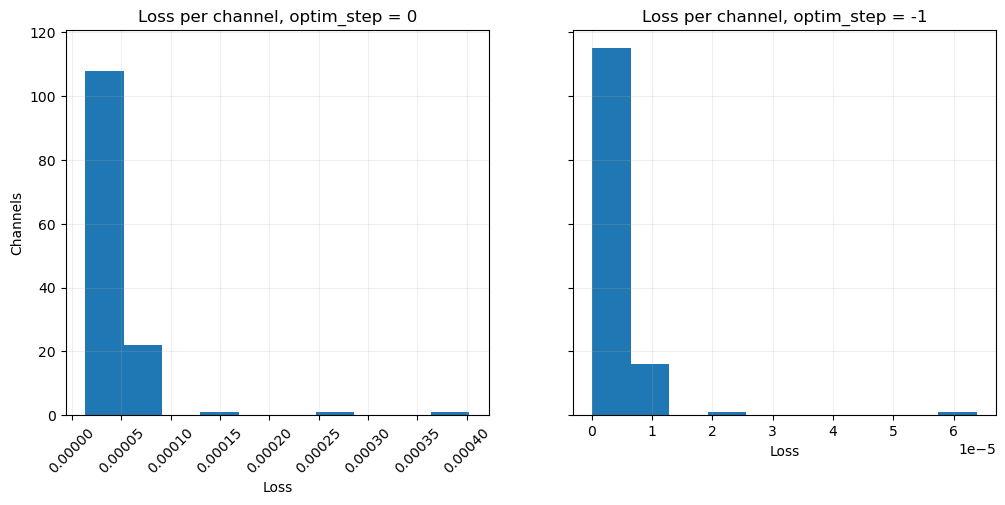

In [8]:
# distribution of loss over channels for the last epoch
fig, ax = plt.subplots(1, 2, figsize=(12,5), sharey=True)
optim_step = [0, -1]

ax[0].hist(ds.loss_by_channel[optim_step[0], :],)
ax[0].set_xlabel("Loss"); ax[0].set_ylabel("Channels")
ax[0].set_title(f"Loss per channel, optim_step = {optim_step[0]}")
ax[0].grid(alpha=0.2)
ax[0].tick_params(axis='x', rotation=45)

ax[1].hist(ds.loss_by_channel[optim_step[1], :],)
ax[1].set_xlabel("Loss")
ax[1].set_title(f"Loss per channel, optim_step = {optim_step[-1]}")
#plt.savefig('loss_by_var.png', dpi=300)
ax[1].grid(alpha=0.2)
plt.show()